In [236]:
# importing needed libraries 
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Creating the data

Data Shape: torch.Size([300, 2])
Label Shape: torch.Size([300])


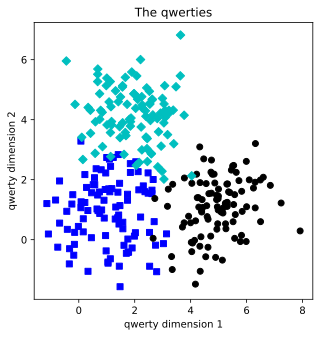

In [237]:
# create the data
nPerClust = 100
blur = 1

# center coordinates for the data cloud
A = [1, 1]
B = [5, 1]
C = [2, 4]

# generating the data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

# the true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),np.full((nPerClust,1),2)))

data_np = np.hstack((a,b,c)).T

# converting to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np,dtype=torch.long).squeeze() # must use squeeze to get correct label shape
print("Data Shape:",data.shape)
print("Label Shape:",labels.shape)

# showing the data 
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'cD')
plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Creating the ANN model

In [238]:
# model architecture
QwertyANN = nn.Sequential(
    nn.Linear(2,64),    # input layer
    nn.ReLU(),          # activation
    nn.Linear(64,64),   # hidden layer
    nn.ReLU(),          # activation
    nn.Linear(64,3),    # output layer
)

# loss function
lossFunction = nn.CrossEntropyLoss() # includes Log softmax

# optimizer
optimizer = torch.optim.SGD(QwertyANN.parameters(), lr=.01)

# Training the model

In [239]:
numEpochs = 2000

# initialize losses
losses = torch.zeros(numEpochs)
ongoingAccuracy = []

# iterating through training
for epochIDX in range(numEpochs):

    # forward pass
    yHat = QwertyANN(data)

    # computing loss
    loss = lossFunction(yHat, labels)
    losses[epochIDX] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # computing accuracy
    matches = torch.argmax(yHat, axis=1) == labels      # convert to bool
    matchesNumeric = matches.float()                    # convert to 0 or 1
    accuracyPercent = 100*torch.mean(matchesNumeric)    # take avg and *100
    ongoingAccuracy.append(accuracyPercent)

# final forward pass
predictions = QwertyANN(data)
predLabels = torch.argmax(predictions, axis=1)
totalACC = 100*torch.mean((predLabels == labels).float())

# Visualizing the results

Final accuracy: 96%


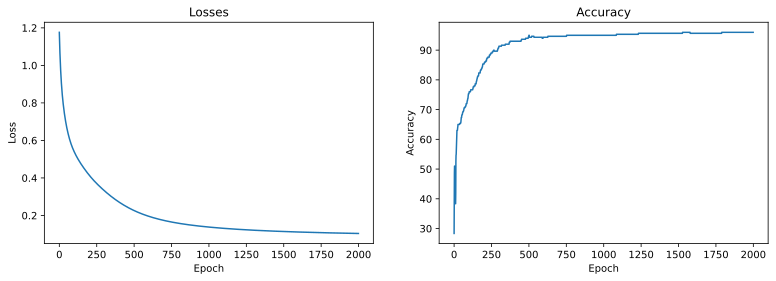

In [240]:
# report final accuracy 
print('Final accuracy: %g%%' %totalACC)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAccuracy)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')

plt.show()

In [241]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

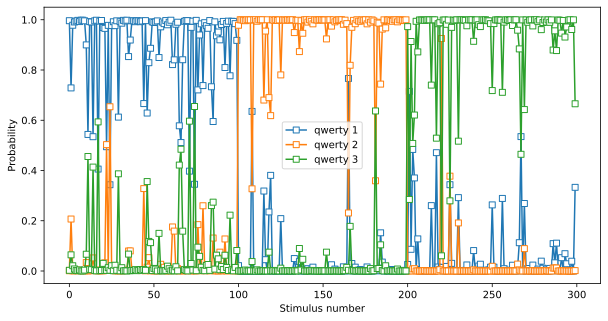

In [242]:
# plotting the raw model outputs

fix = plt.figure(figsize=(10,5))

plt.plot(sm(yHat.detach()),'s-',markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwerty 1','qwerty 2','qwerty 3'])
plt.show()